**5_K-Nearest Neighbors (KNN)**

Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Import File or File Path

In [ ]:
url='https://raw.githubusercontent.com/CSI-Project444/CSI/main/Data/Final01.csv'
df=pd.read_csv(url)
df

,Zone,mag1,mag2,mag3,mag4,mag5,mag6,mag7,mag8,mag9,...,mag43,mag44,mag45,mag46,mag47,mag48,mag49,mag50,mag51,mag52
0,1,13.416408,13.416408,13.000000,13.416408,13.000000,12.083046,12.083046,11.704700,11.704700,...,10.049876,9.055385,9.219544,9.219544,9.486833,8.544004,8.544004,8.944272,8.062258,7.211103
1,1,12.041595,12.083046,12.083046,12.649111,11.704700,11.704700,11.180340,11.180340,10.295630,...,10.630146,8.485281,8.602325,8.602325,8.602325,8.944272,8.944272,8.544004,7.280110,7.280110
2,1,11.045361,11.704700,12.083046,11.180340,12.083046,11.180340,11.661904,11.180340,10.295630,...,10.630146,9.219544,9.219544,8.602325,8.602325,8.944272,8.544004,8.544004,7.280110,7.280110
3,1,12.041595,11.180340,11.401754,12.165525,11.180340,11.180340,10.198039,10.198039,10.198039,...,10.295630,8.944272,8.544004,8.544004,8.246211,8.246211,8.246211,8.062258,8.000000,7.000000
4,1,5.099020,11.180340,10.770330,10.770330,10.770330,10.770330,10.770330,9.848858,9.848858,...,9.000000,9.055385,8.062258,8.246211,8.246211,7.615773,7.615773,7.615773,7.211103,7.211103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7937,4,5.000000,10.440307,10.198039,10.198039,10.198039,10.198039,10.049876,10.049876,10.049876,...,11.401754,10.198039,9.219544,9.219544,9.055385,9.000000,8.000000,8.062258,7.071068,7.071068
7938,4,6.403124,10.295630,10.816654,11.661904,10.816654,10.816654,10.000000,10.000000,10.630146,...,11.180340,11.180340,10.295630,9.433981,10.000000,9.219544,7.810250,8.485281,8.485281,7.810250
7939,4,10.770330,10.440307,10.440307,10.440307,10.440307,10.440307,10.770330,9.848858,9.848858,...,11.313709,10.630146,10.000000,10.000000,9.433981,9.433981,8.944272,8.944272,8.246211,7.280110
7940,4,6.403124,9.848858,9.848858,10.770330,9.848858,9.848858,9.486833,9.486833,9.486833,...,12.165525,10.198039,10.049876,9.000000,10.000000,9.000000,10.049876,9.055385,8.246211,7.280110


แบ่งชุดข้อมูลเป็นข้อมูล test และข้อมูล train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization
test_size=0.6
X_train, X_test, y_train, y_test = train_test_split(
    df[['mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'mag8',
       'mag9', 'mag10', 'mag11', 'mag12', 'mag13', 'mag14', 'mag15', 'mag16',
       'mag17', 'mag18', 'mag19', 'mag20', 'mag21', 'mag22', 'mag23', 'mag24',
       'mag25', 'mag26', 'mag27', 'mag28', 'mag29', 'mag30', 'mag31', 'mag32',
       'mag33', 'mag34', 'mag35', 'mag36', 'mag37', 'mag38', 'mag39', 'mag40',
       'mag41', 'mag42', 'mag43', 'mag44', 'mag45', 'mag46', 'mag47', 'mag48',
       'mag49', 'mag50', 'mag51', 'mag52']], 
    df.Zone, 
    test_size=test_size, random_state=7)

สร้างแบบจำลอง K-Nearest Neighbours

In [ ]:
prefer_k = 16
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.57389937, 0.57480315, 0.55433071, 0.61417323, 0.56377953])

ดูค่า Accuracy

In [ ]:
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.576 (0.020)


**วิธีเลือกค่า K**

ทุกตัว

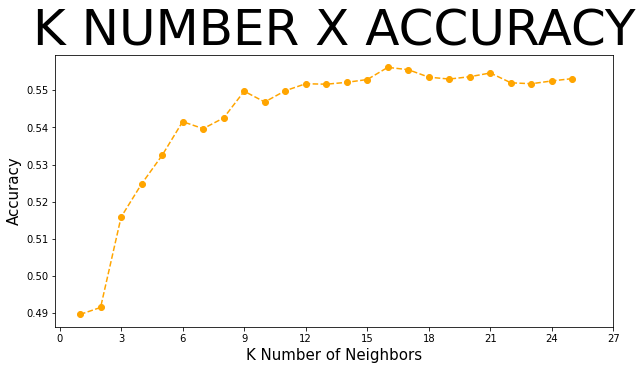

The best value of k = {'n_neighbors': 16} with 0.5561625660039979 of accuracy.


In [ ]:
k_list = list(range(1,25+1))
k_values = dict(n_neighbors=k_list)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')
grid.fit(df[[ 'mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'mag8',
       'mag9', 'mag10', 'mag11', 'mag12', 'mag13', 'mag14', 'mag15', 'mag16',
       'mag17', 'mag18', 'mag19', 'mag20', 'mag21', 'mag22', 'mag23', 'mag24',
       'mag25', 'mag26', 'mag27', 'mag28', 'mag29', 'mag30', 'mag31', 'mag32',
       'mag33', 'mag34', 'mag35', 'mag36', 'mag37', 'mag38', 'mag39', 'mag40',
       'mag41', 'mag42', 'mag43', 'mag44', 'mag45', 'mag46', 'mag47', 'mag48',
       'mag49', 'mag50', 'mag51', 'mag52']], df.Zone)
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 50})
plt.xticks(range(0,30,3),)
plt.show()
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))